## Целью проекта является подготовка датасета к использованию при построении модели которая,будет предсказывать результаты госэкзамена по математике.
### Необходимо:
- Провести первичную обработку данных и избавиться от выбросов
- Провести корреляционный анализ числовых данных
- Анализ номинативных данных при помощи графиков и теста Стьюдента
- Подведение результатов и выбор столбцов для построения модели


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import combinations
from scipy.stats import ttest_ind
stud_math = pd.read_csv('stud_math.csv')

In [2]:
# Вывод значений столбца на экран
def column_check(column):
    display(pd.DataFrame(stud_math[column].value_counts()))

# функция для поиска выбросов и замены их на NaN


def outlier_remover(column):
    IQR = stud_math[column].quantile(0.75) - stud_math[column].quantile(0.25)
    perc25 = stud_math[column].quantile(0.25)
    perc75 = stud_math[column].quantile(0.75)
    stud_math[column] = stud_math[column].apply(
        lambda x: np.nan if x > perc75+1.5*IQR or x < perc25-1.5*IQR else x)

# Функция принимает названия столбца и выводит boxplot на котором показанно
# отношение суммы уникальных значений принятого столбца к столбцу score


def score_boxplot(column):
    fig, ax = plt.subplots(figsize=(15, 5))
    sns.boxplot(x=column, y='score',
                data=stud_math.loc[stud_math.loc[:, column].isin(
                    stud_math.loc[:, column].value_counts().index)],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    ax.grid(axis="y")
    plt.show()

# Функция принимает название столбца,меняет тип данных внутри него на str и nan на None


def float_to_string(column):
    stud_math[column] = stud_math[column].apply(lambda x: str(x))
    stud_math[column] = stud_math[column].apply(
        lambda x: None if x == 'nan' else x)

# Функция для проверки номинативных значений тестом Стьюдента


def stat_dif(column):
    cols = stud_math.loc[:, column].value_counts().index
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_math.loc[stud_math.loc[:, column] == comb[0], 'score'],
                     stud_math.loc[stud_math.loc[:, column] == comb[1], 'score'], nan_policy='omit').pvalue \
                <= 0.05/len(combinations_all):  # Учет поправки Бонферони
            print('Статистически значимые значения в колонке:', column)
            break

In [3]:
# Переименовываем столбцы в более удобные для нас названия
stud_math.columns = ['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu', 'mjob', 'fjob',
                     'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
                     'activities', 'nursery', 'studytime_granular', 'higher', 'internet', 'romantic', 'famrel',
                     'freetime', 'goout', 'health', 'absences', 'score']

In [4]:
stud_math.head(10)

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,...,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,...,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,...,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,...,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,...,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,...,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [5]:
stud_math.info()
#Видно что в датасете имеются пустые значения, + часть значений отображающих номер группы является типом floa

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   school              395 non-null    object 
 1   sex                 395 non-null    object 
 2   age                 395 non-null    int64  
 3   address             378 non-null    object 
 4   famsize             368 non-null    object 
 5   pstatus             350 non-null    object 
 6   medu                392 non-null    float64
 7   fedu                371 non-null    float64
 8   mjob                376 non-null    object 
 9   fjob                359 non-null    object 
 10  reason              378 non-null    object 
 11  guardian            364 non-null    object 
 12  traveltime          367 non-null    float64
 13  studytime           388 non-null    float64
 14  failures            373 non-null    float64
 15  schoolsup           386 non-null    object 
 16  famsup  

In [6]:
# Изначально проверяем столбцы на ошибки
# Смотрим все номинативные вместе, так как колличества элементов в кажом из них маленькое и посему ошибки будет легко найти
for colcheck in ['school', 'sex', 'address', 'famsize', 'pstatus', 'medu', 'fedu', 'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'studytime_granular', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health']:
    column_check(colcheck)
# мы не знаем что за данные находятся studytime_granular, но уникальных элементов всего 4 и самый редкий встречается 24 раза
# так что вероятно ошибок в нем нет

,school
GP,349
MS,46


,sex
F,208
M,187


,address
U,295
R,83


,famsize
GT3,261
LE3,107


,pstatus
T,314
A,36


,medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


,fedu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


,mjob
other,133
services,98
at_home,58
teacher,55
health,32


,fjob
other,197
services,102
teacher,29
at_home,16
health,15


,reason
course,137
home,104
reputation,103
other,34


,guardian
mother,250
father,86
other,28


,traveltime
1.0,242
2.0,96
3.0,22
4.0,7


,studytime
2.0,194
1.0,103
3.0,64
4.0,27


,failures
0.0,293
1.0,49
2.0,16
3.0,15


,schoolsup
no,335
yes,51


,famsup
yes,219
no,137


,paid
no,200
yes,155


,activities
yes,195
no,186


,nursery
yes,300
no,79


,studytime_granular
-6.0,194
-3.0,103
-9.0,64
-12.0,27


,higher
yes,356
no,19


,internet
yes,305
no,56


,romantic
no,240
yes,124


,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,7
-1.0,1


,freetime
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18


,goout
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23


,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43


In [7]:
# ошибок нашлось всего 2, заменим их значения
stud_math.loc[stud_math.fedu == 40, 'fedu'] = np.nan
stud_math.loc[stud_math.famrel == -1, 'famrel'] = np.nan

In [8]:
# Посмотрим столбцы с большим колличеством уникальный элементов отдельно друг от друга
display(stud_math.age.value_counts())
stud_math.age.describe()
# тут студент 22 лет "по формуле" является выбросом
# но так как статистика именно студентов от 15 до 22 было бы странно его выкидывать

16    104
17     98
15     82
18     82
19     24
20      3
21      1
22      1
Name: age, dtype: int64

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

In [9]:
# очевидны выбросы, необходимо убрать их написанной ранее функцей
stud_math.absences.describe()

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

In [10]:
outlier_remover('absences')
stud_math.absences.describe()

count    366.000000
mean       4.603825
std        4.965512
min        0.000000
25%        0.000000
50%        4.000000
75%        7.000000
max       20.000000
Name: absences, dtype: float64

In [11]:
stud_math.score.describe()  # по минимуму и максимуму видно что ошибок в столбце нет
# Так же легко видеть что выбросов тоже нет

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

In [12]:
# часть номинативных имеет тип данных float, что может помешать при дальнейшем анализе,изменим тип на string
for tostr in ['medu', 'fedu', 'traveltime', 'studytime', 'failures', 'studytime_granular', 'famrel', 'freetime',
              'goout', 'health']:
    float_to_string(tostr)

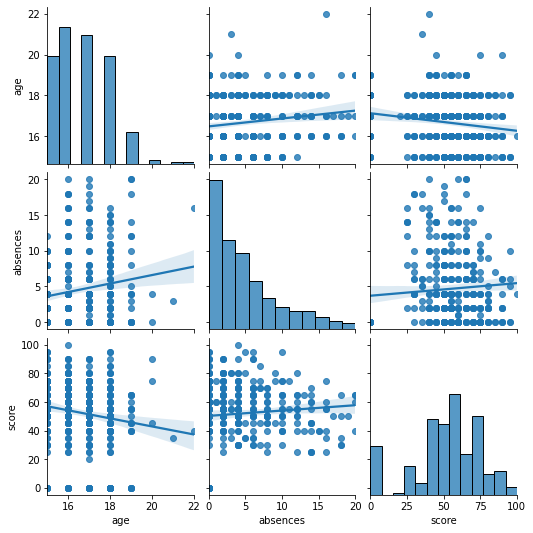

In [13]:
# проведем корреляционный анализ
sns.pairplot(stud_math, kind='reg')

In [14]:
stud_math.corr()
# и absences и age слабо коррелированы, но некоторая взаимосвязь все же проскакивает
# с возрастом оценка падает, вероятно из-за повышающейся сложности материала
# c absences все не так очевидно, так как людей которые не пропустили ничего очень много, а тех кто много пропускал мало
# но все равно можно увидеть что, например пропуствише 11 и более занятий студенты не получают баллы выше 80

,age,absences,score
age,1.000000,0.151493,-0.155726
absences,0.151493,1.000000,0.081274
score,-0.155726,0.081274,1.000000


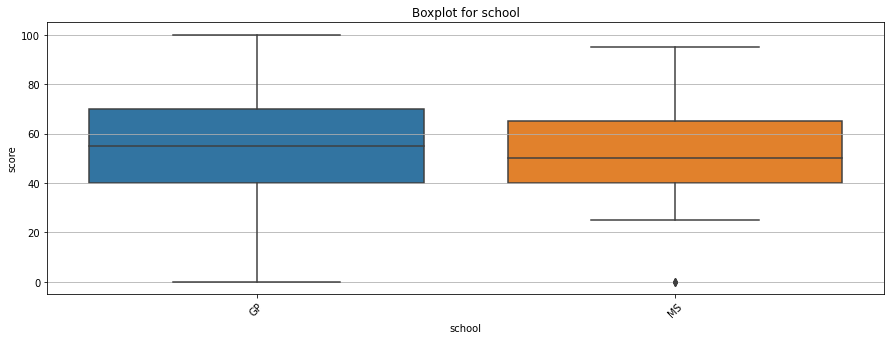

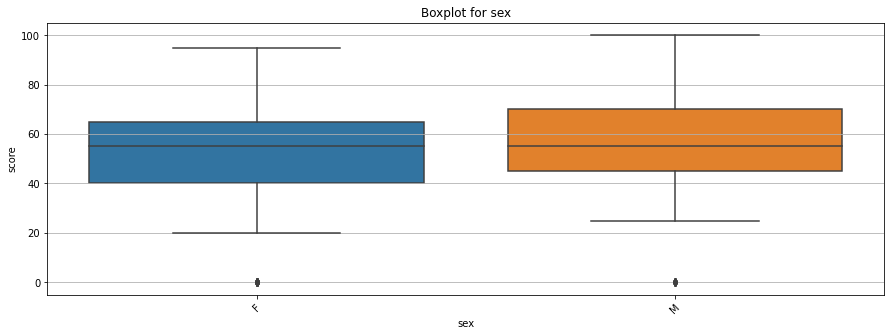

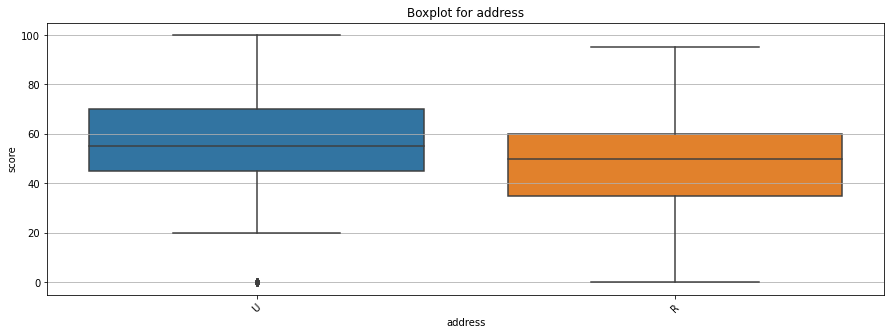

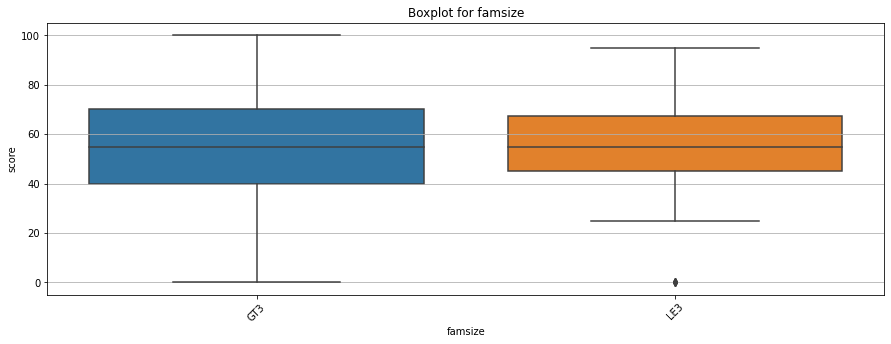

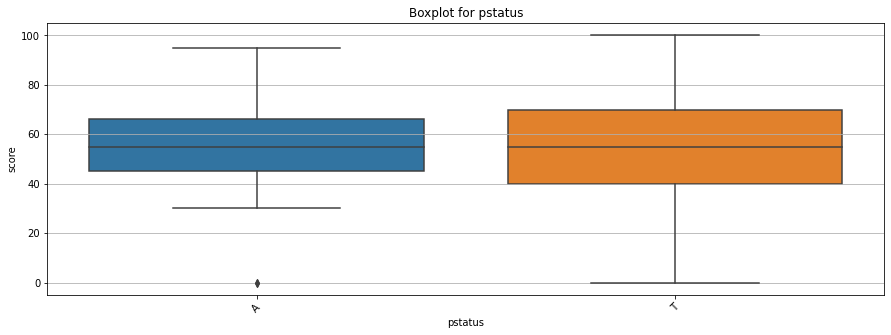

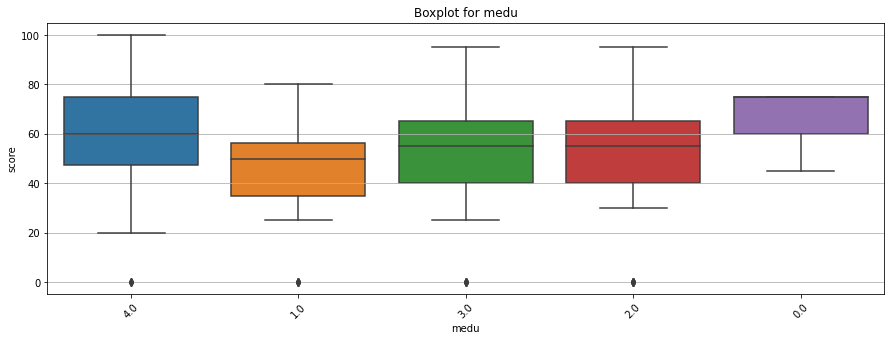

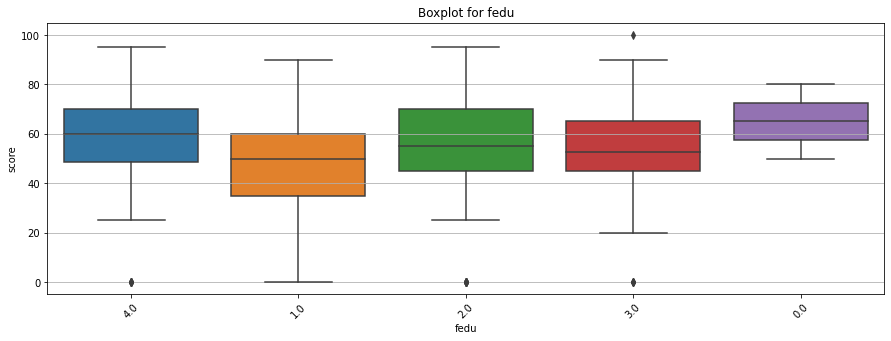

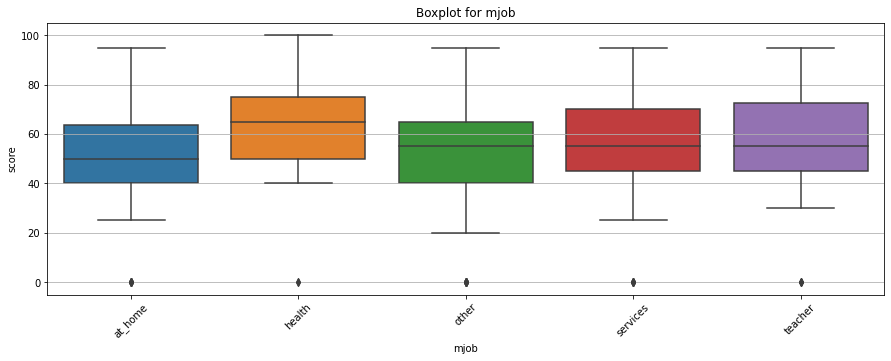

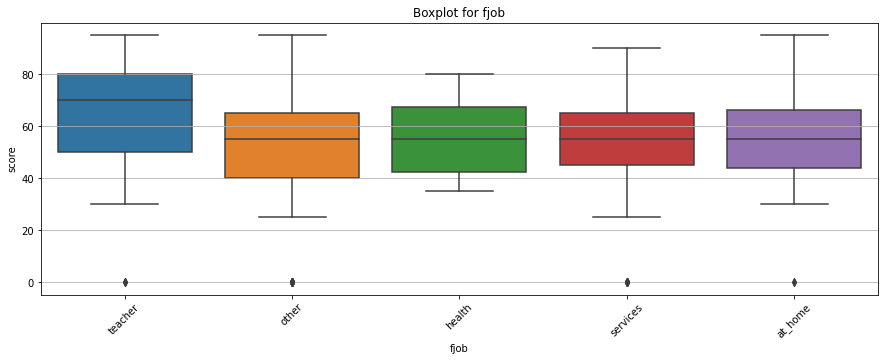

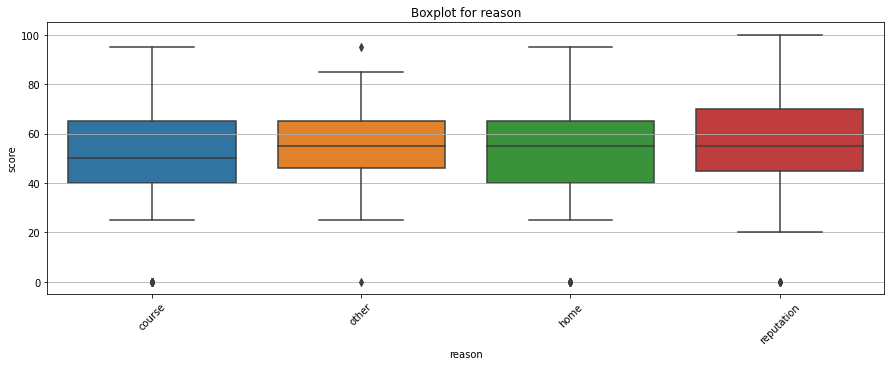

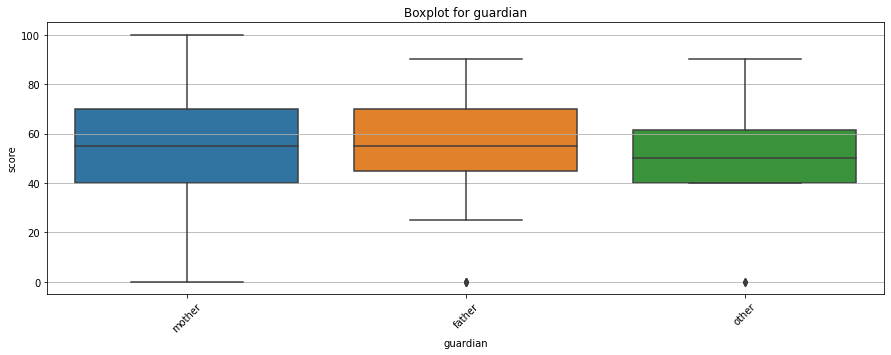

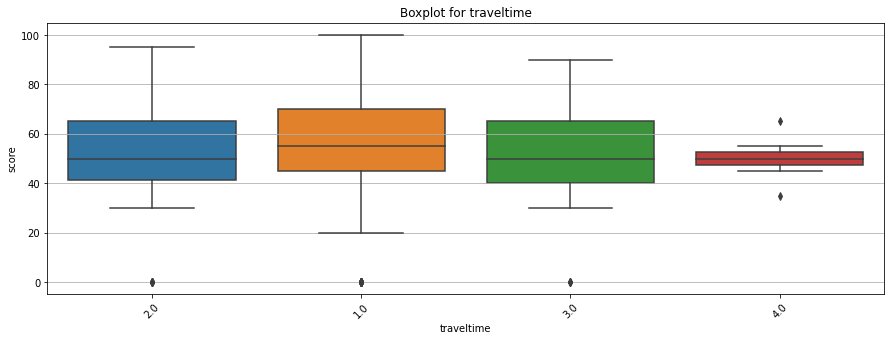

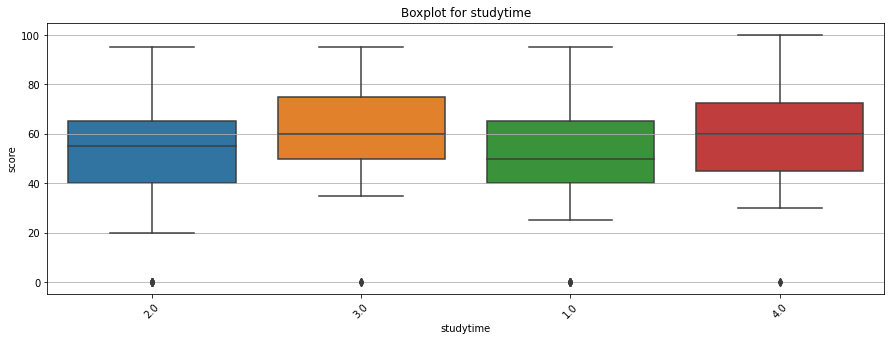

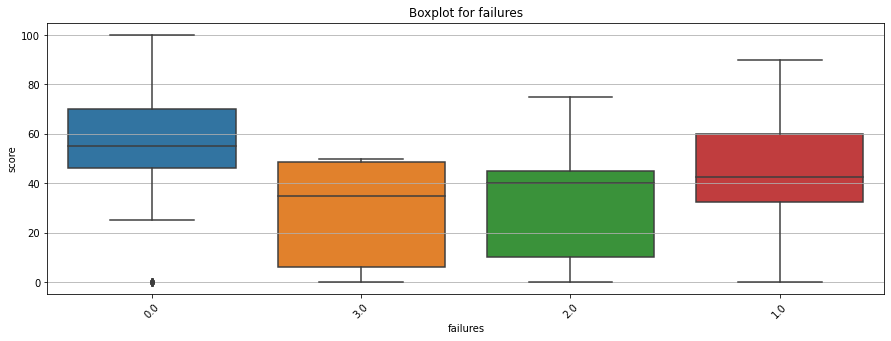

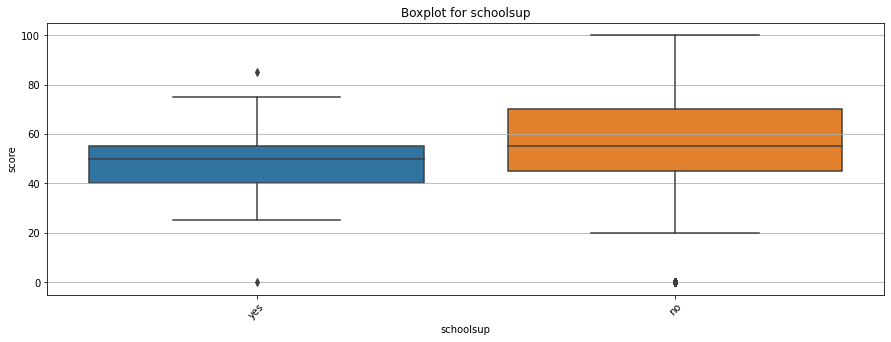

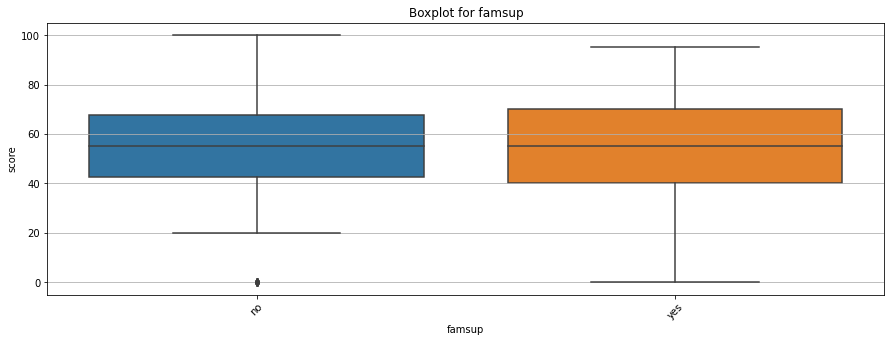

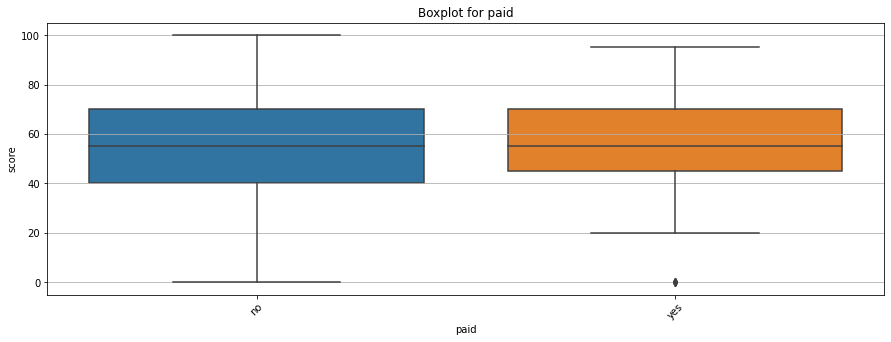

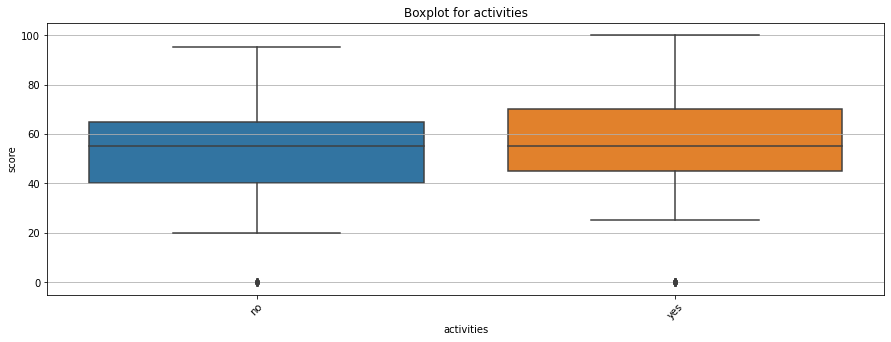

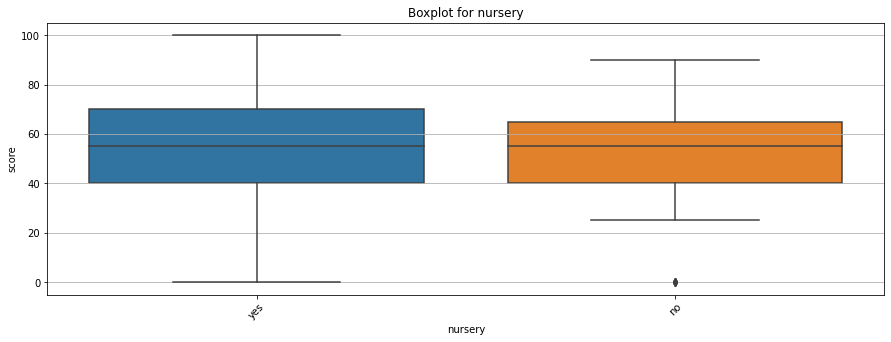

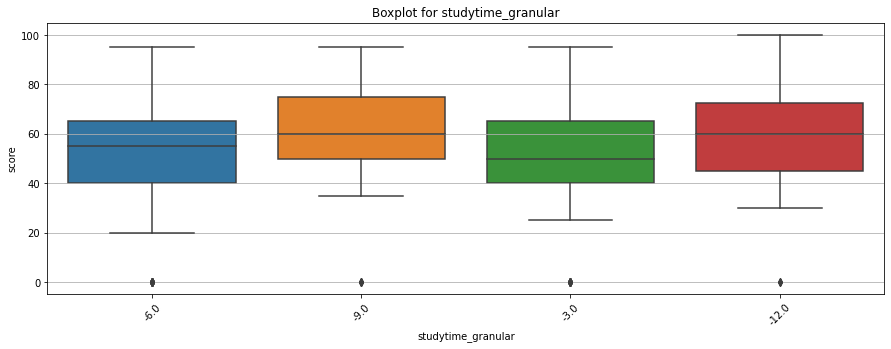

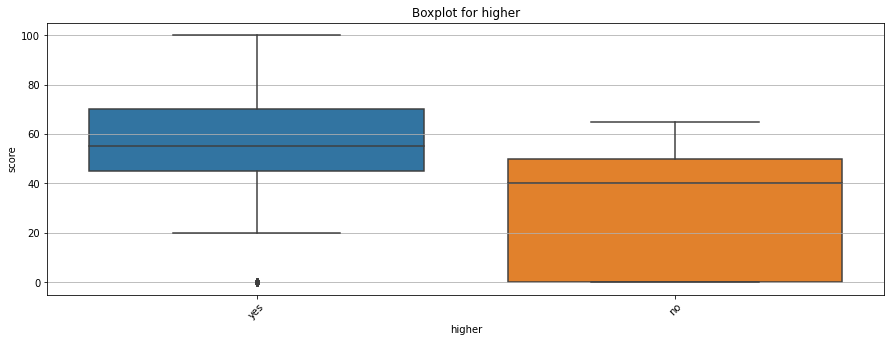

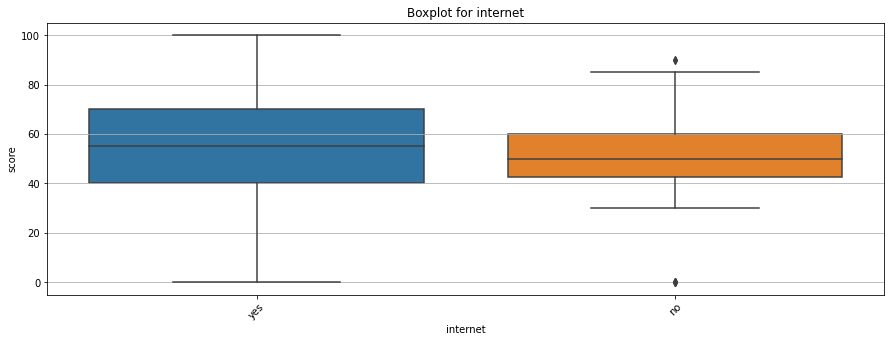

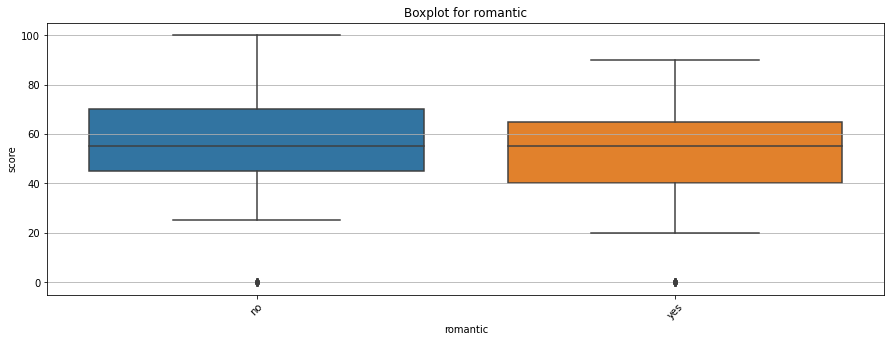

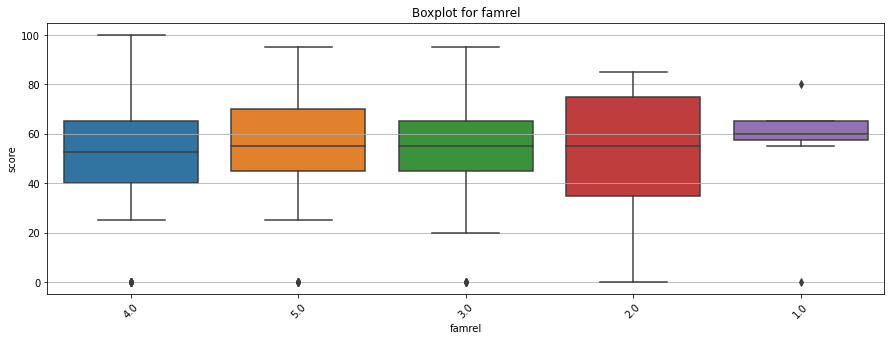

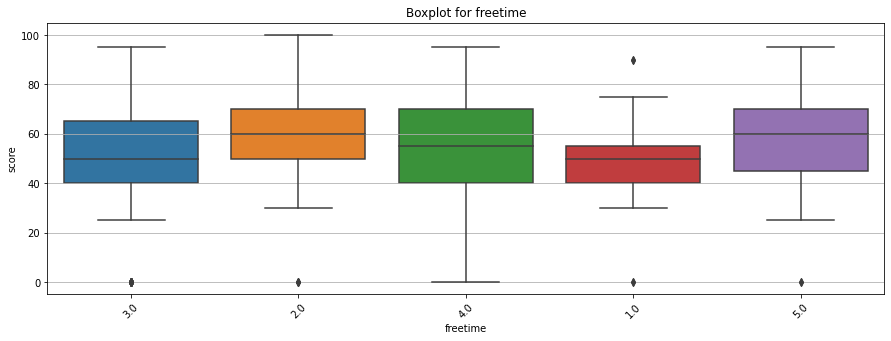

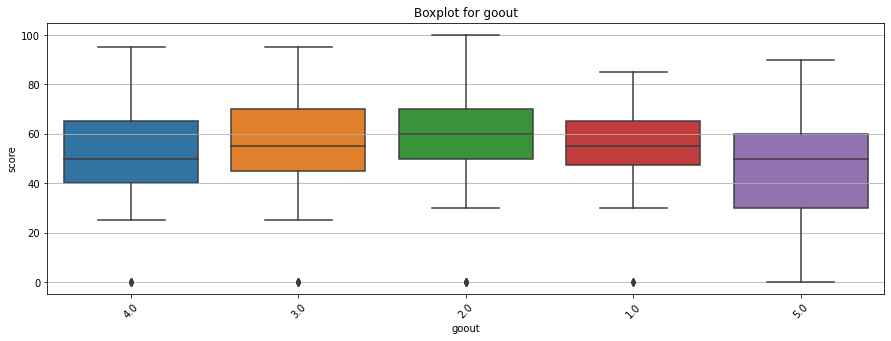

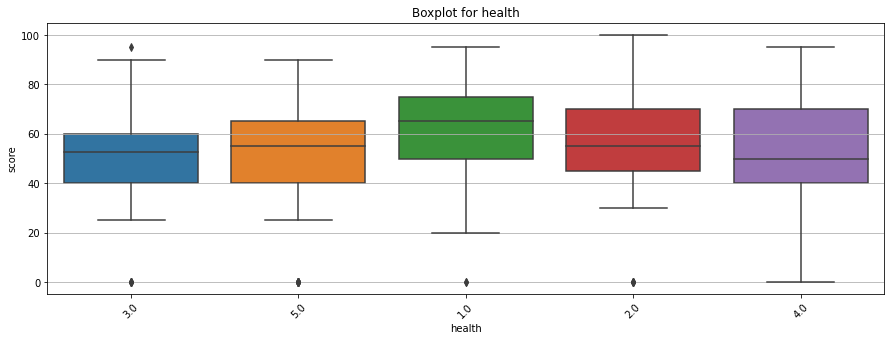

In [15]:
# Теперь посмотрим на номинативные переменные
for col in ['school', 'sex', 'address', 'famsize', 'pstatus', 'medu', 'fedu', 'mjob', 'fjob',
            'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup',
            'paid', 'activities', 'nursery', 'studytime_granular', 'higher', 'internet', 'romantic',
            'famrel', 'freetime', 'goout', 'health']:
    score_boxplot(col)

In [16]:
# по таблицам отностиельно сложно что либо сказать, по этому проведем тест Cтьюдента
for col in ['school', 'sex', 'address', 'famsize', 'pstatus', 'medu', 'fedu', 'mjob', 'fjob',
            'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup',
            'paid', 'activities', 'nursery', 'studytime_granular', 'higher', 'internet', 'romantic',
            'famrel', 'freetime', 'goout', 'health']:
    stat_dif(col)

Статистически значимые значения в колонке: address
Статистически значимые значения в колонке: medu
Статистически значимые значения в колонке: mjob
Статистически значимые значения в колонке: failures
Статистически значимые значения в колонке: higher
Статистически значимые значения в колонке: romantic
Статистически значимые значения в колонке: goout


In [17]:
stud_math_model = stud_math.loc[:, ['age', 'address', 'medu', 'mjob',
                                    'failures', 'higher', 'romantic', 'goout', 'absences', 'score']]
stud_math_model

,age,address,medu,mjob,failures,higher,romantic,goout,absences,score
0,18,U,4.0,at_home,0.0,yes,no,4.0,6.0,30.0
1,17,U,1.0,at_home,0.0,yes,no,3.0,4.0,30.0
2,15,U,1.0,at_home,3.0,yes,NaN,2.0,10.0,50.0
3,15,U,4.0,health,0.0,yes,yes,2.0,2.0,75.0
4,16,U,3.0,other,0.0,yes,no,2.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...
390,20,U,2.0,services,2.0,yes,no,4.0,NaN,45.0
391,17,U,3.0,services,0.0,yes,no,5.0,3.0,80.0
392,21,R,1.0,other,3.0,NaN,no,3.0,3.0,35.0
393,18,R,3.0,services,0.0,yes,no,1.0,0.0,50.0


# Выводы
#### В результате EDA для анализа влияния условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике были получены следующие выводы:
- В данных малое колличество пустых значений, так же было выявлено маленькое колличество ошибок внутри столбцов
- Выбросы были найдены лишь в столбце колличества пропущенных заданий, что позволяет сделать вывод о чистоте данных
- Статистическая значимость medu и mjob и отсутствие таковой у fedu и fjob может говорить о том что отец зачастую сильнее влияет не ребенка чем мать
- Студенты проводящие слишком много времени с друзьями или имеющие романтические отношения учатся хуже
- У студентов живущих в городе оценки выше чем у тех, кто живет за городом
- Внеучебные неудачи сильно влияют на успеваемость студента
- Важнейшими параметрами, которые предлагается использовать для построения модели, можно выделить: age,absences,adress,medu,mjob,failures,higher,romantic,goout.
